# ISOM 352 Final Project - Group 7

In [75]:
# plt.style.use('ggplot')

# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

## Step 1: Load and clean dataset

In [76]:
# Read and explore dataset
df = pd.read_csv('student_alcohol.csv') 
df = df.drop(['Timestamp', 'Your Matric (grade 12) Average/ GPA (in %)'], axis=1)

df.info()

# Process missing values
df = df.dropna()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 15 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Your Sex?                                                                                          404 non-null    object 
 1   What year were you in last year (2023) ?                                                           333 non-null    object 
 2   What faculty does your degree fall under?                                                          399 non-null    object 
 3   Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                 320 non-null    float64
 4   Your Accommodation Status Last Year (2023)                                                         383 non-null    object 

Your Sex?                                                                                            0
What year were you in last year (2023) ?                                                             0
What faculty does your degree fall under?                                                            0
Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)                   0
Your Accommodation Status Last Year (2023)                                                           0
Monthly Allowance in 2023                                                                            0
Were you on scholarship/bursary in 2023?                                                             0
Additional amount of studying (in hrs) per week                                                      0
How often do you go out partying/socialising during the week?                                        0
On a night out, how many alcoholic drinks do you consume?                

In [77]:
# Renaming all variables
df1 = df.rename(columns={"Your Sex?":"sex",
                        "What year were you in last year (2023) ?":"grade",
                        "What faculty does your degree fall under?":"major",
                        "Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)":"uni_gpa",
                        "Your Accommodation Status Last Year (2023)":"accomodation",
                        "Monthly Allowance in 2023":"allowance",
                        "Were you on scholarship/bursary in 2023?":"scholarship",
                        "Additional amount of studying (in hrs) per week":"study_hrs",
                        "How often do you go out partying/socialising during the week? ":"social_freq",
                        "On a night out, how many alcoholic drinks do you consume?":"drink_freq",
                        "How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)":"missed_class",
                        "How many modules have you failed thus far into your studies?":"failed_module",
                        "Are you currently in a romantic relationship?":"relationship",
                        "Do your parents approve alcohol consumption?":"parent_app",
                        "How strong is your relationship with your parent/s?":"parent_relationship"})

# Checking new variable names
df1.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 402
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  297 non-null    object 
 1   grade                297 non-null    object 
 2   major                297 non-null    object 
 3   uni_gpa              297 non-null    float64
 4   accomodation         297 non-null    object 
 5   allowance            297 non-null    object 
 6   scholarship          297 non-null    object 
 7   study_hrs            297 non-null    object 
 8   social_freq          297 non-null    object 
 9   drink_freq           297 non-null    object 
 10  missed_class         297 non-null    object 
 11  failed_module        297 non-null    object 
 12  relationship         297 non-null    object 
 13  parent_app           297 non-null    object 
 14  parent_relationship  297 non-null    object 
dtypes: float64(1), object(14)
memory usage: 37.1+

,Your Sex?,What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,Female,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,Male,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,Male,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,Male,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,Female,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


In [78]:
# Identify categorical and quantitative features
quant_vars = df1.columns[df1.dtypes != 'object']
cat_vars = df1.columns[df1.dtypes == 'object']
print(quant_vars, cat_vars)

# Converting all `cat_vars`to `category`
for var in cat_vars:
    df1[var] = df1[var].astype('category')

# Checking new variable types

df1.info()





Index(['uni_gpa'], dtype='object') Index(['sex', 'grade', 'major', 'accomodation', 'allowance', 'scholarship',
       'study_hrs', 'social_freq', 'drink_freq', 'missed_class',
       'failed_module', 'relationship', 'parent_app', 'parent_relationship'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 402
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   sex                  297 non-null    category
 1   grade                297 non-null    category
 2   major                297 non-null    category
 3   uni_gpa              297 non-null    float64 
 4   accomodation         297 non-null    category
 5   allowance            297 non-null    category
 6   scholarship          297 non-null    category
 7   study_hrs            297 non-null    category
 8   social_freq          297 non-null    category
 9   drink_freq           297 non-null    category
 10  missed_

In [79]:
df2=df1[df1['major'] == 'Economic & Management Sciences' ]

df2=df2.drop('major',axis=1)



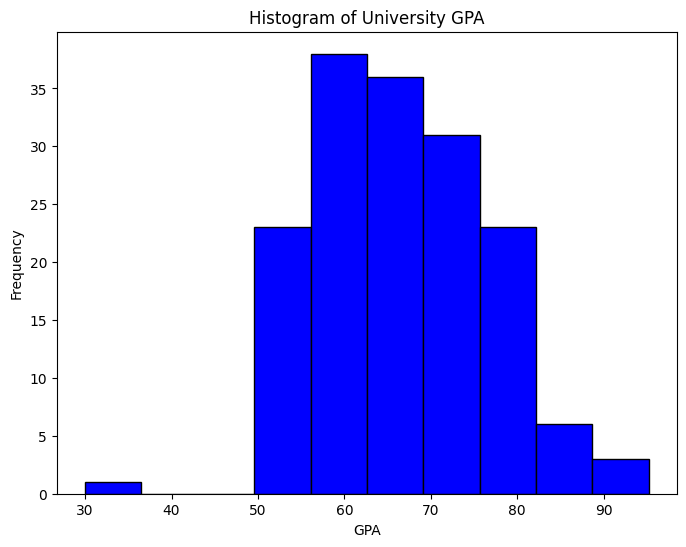

In [87]:

plt.figure(figsize=(8, 6))  # Optional: Specifies the figure size
plt.hist(df2['uni_gpa'], bins=10, color='blue', edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of University GPA')  # Title of the histogram
plt.xlabel('GPA')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.show()

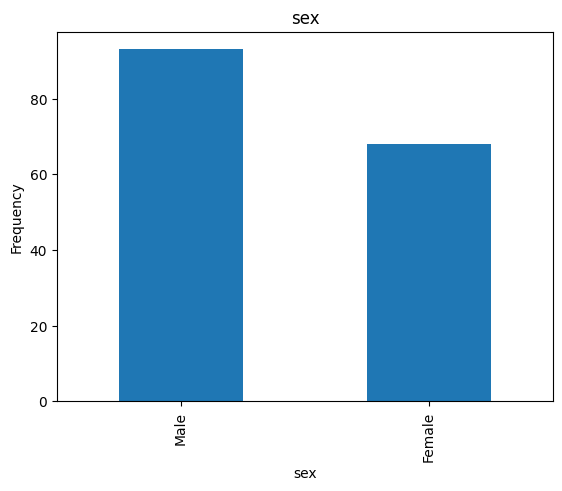

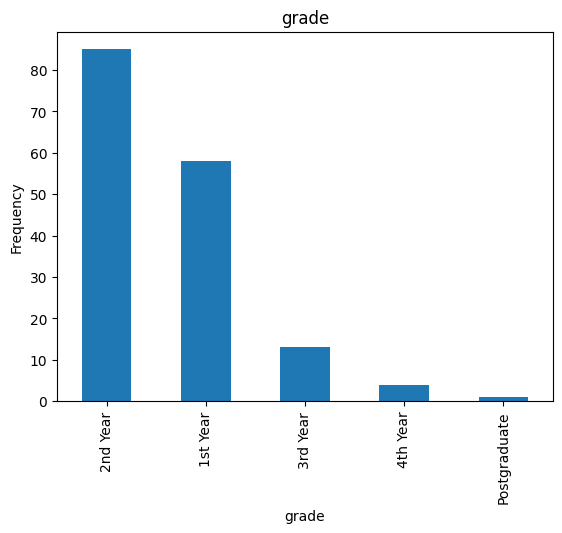

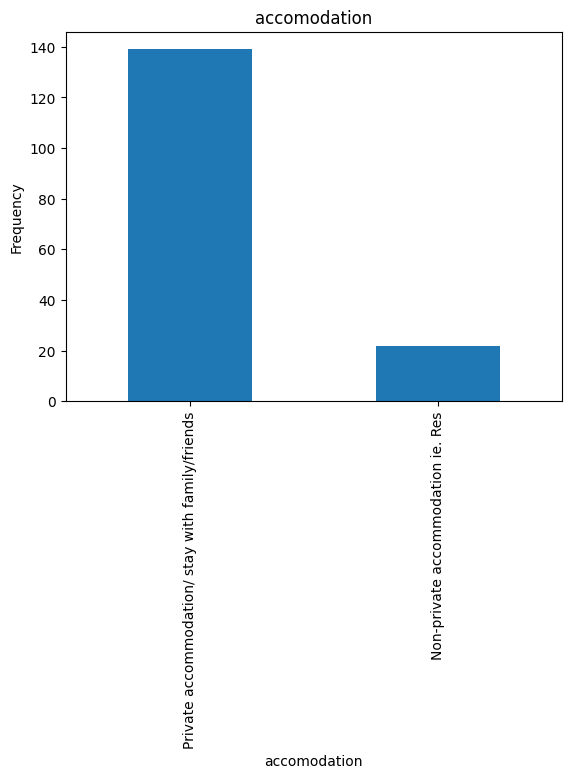

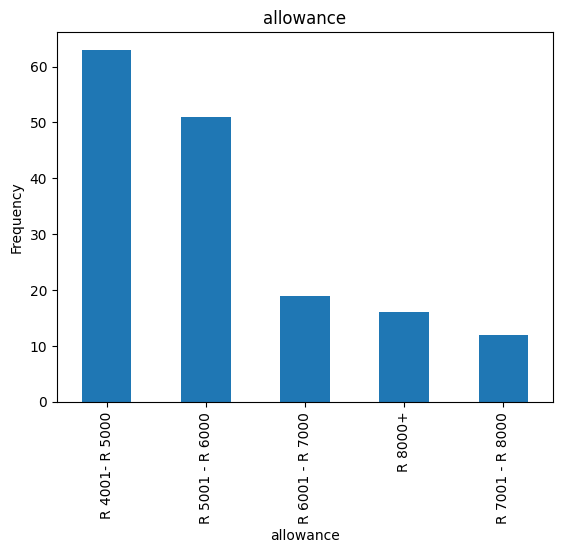

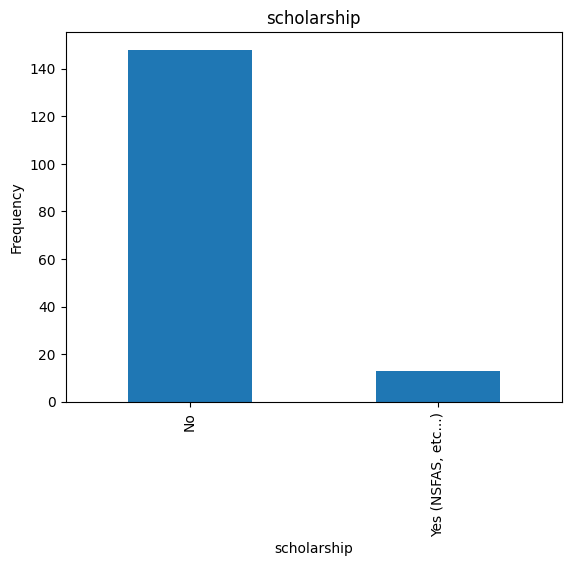

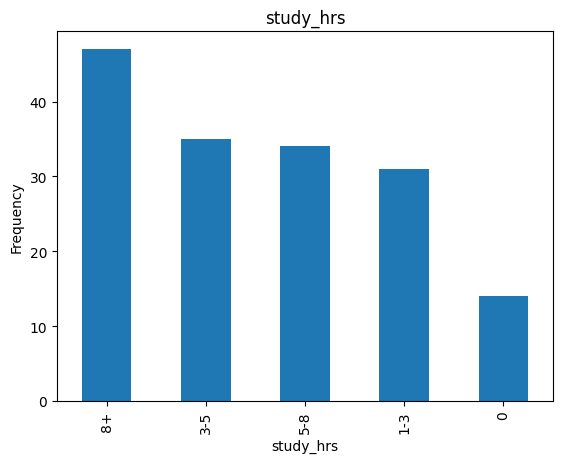

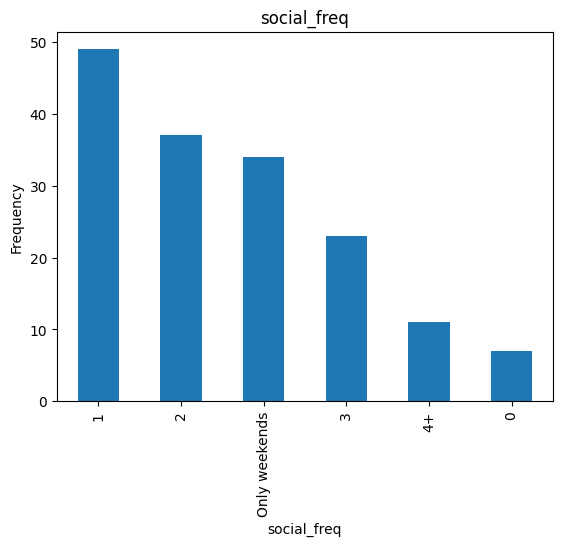

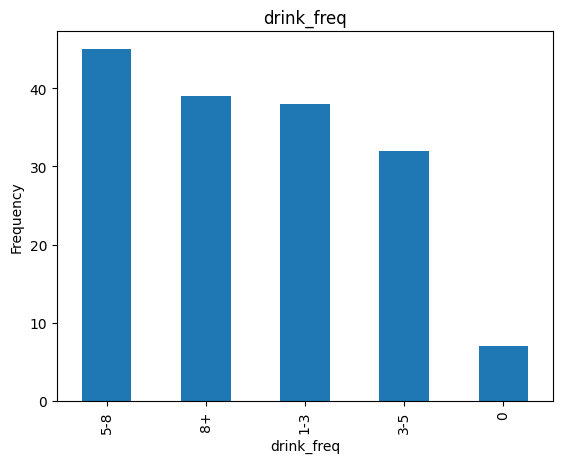

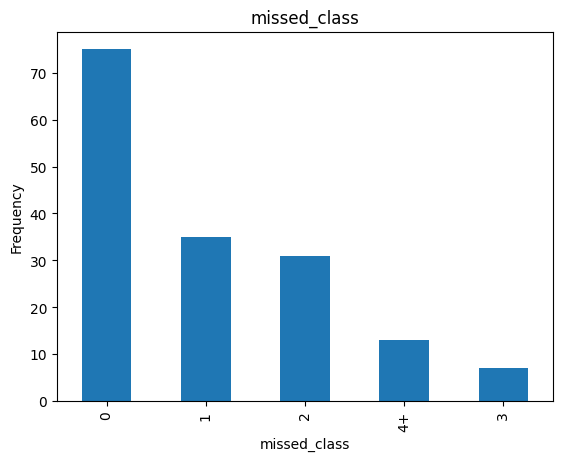

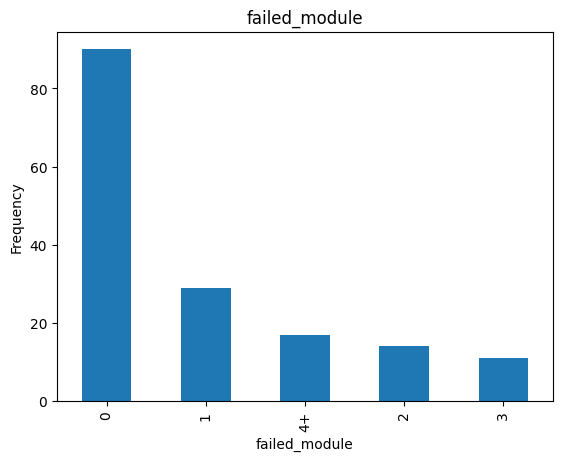

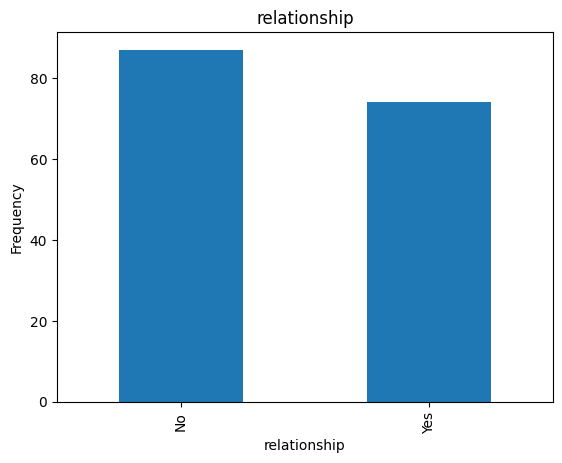

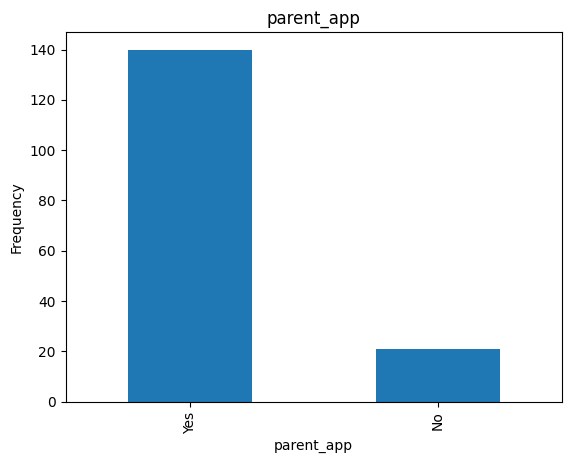

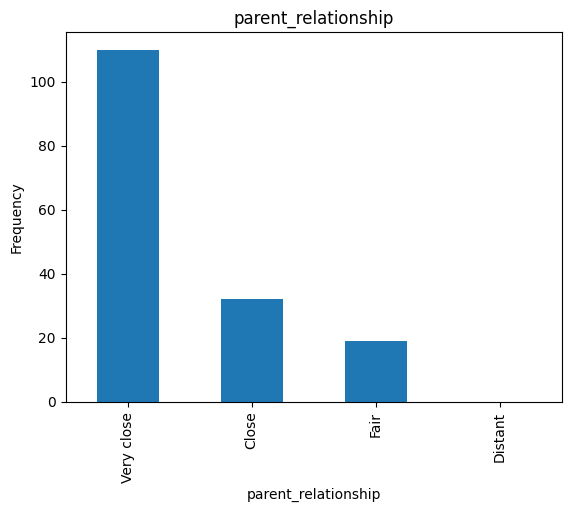

In [84]:
cat_vars = df2.columns[df2.dtypes == 'category']

for column in cat_vars:
    plt.figure()  # Creates a new figure
    df2[column].value_counts().plot(kind='bar', title=column)
    plt.ylabel('Frequency')
    plt.show()

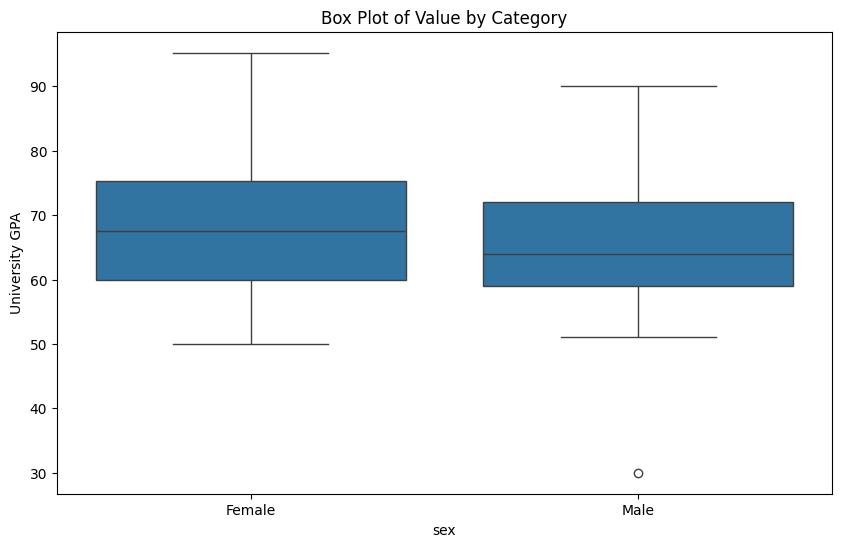

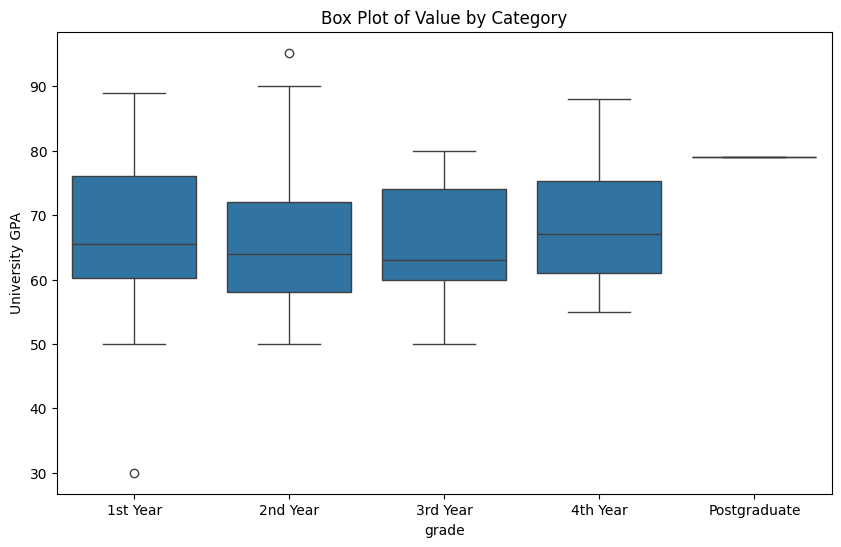

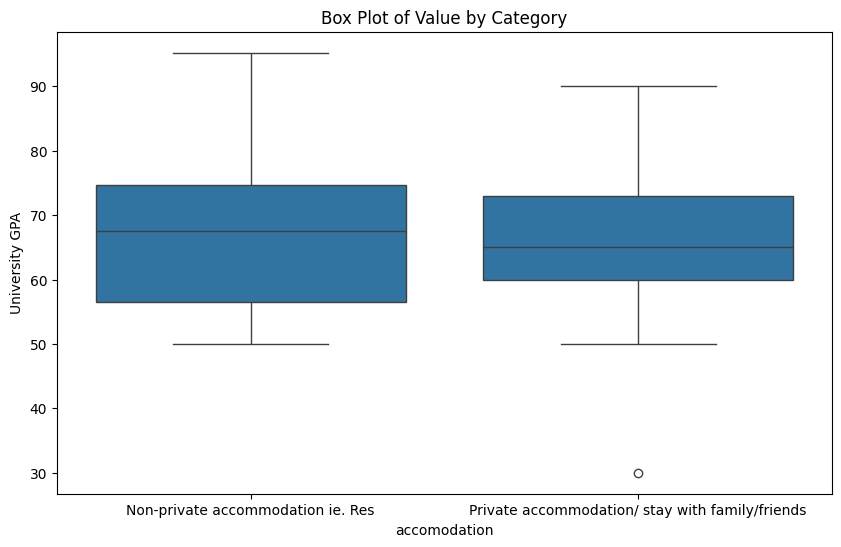

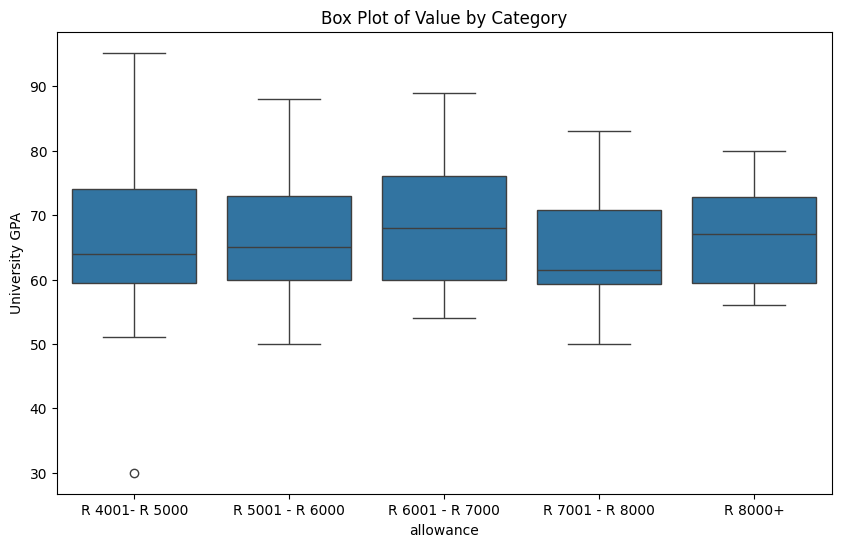

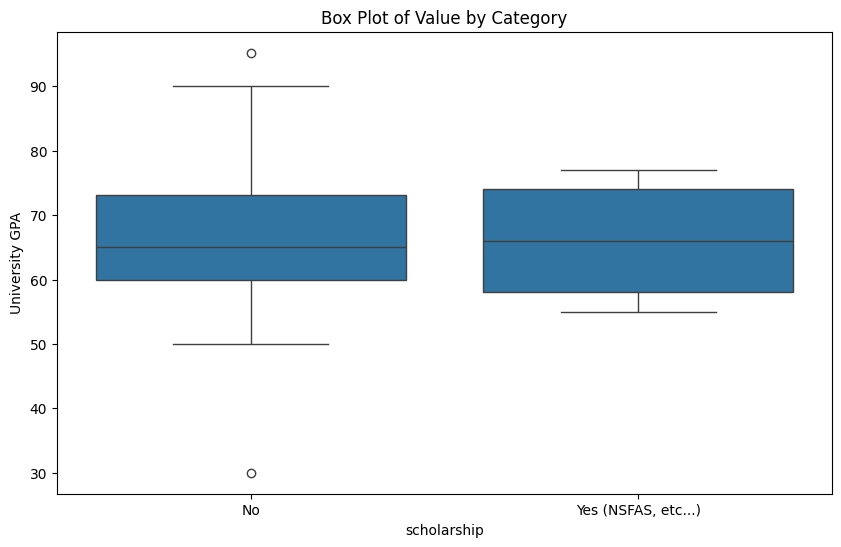

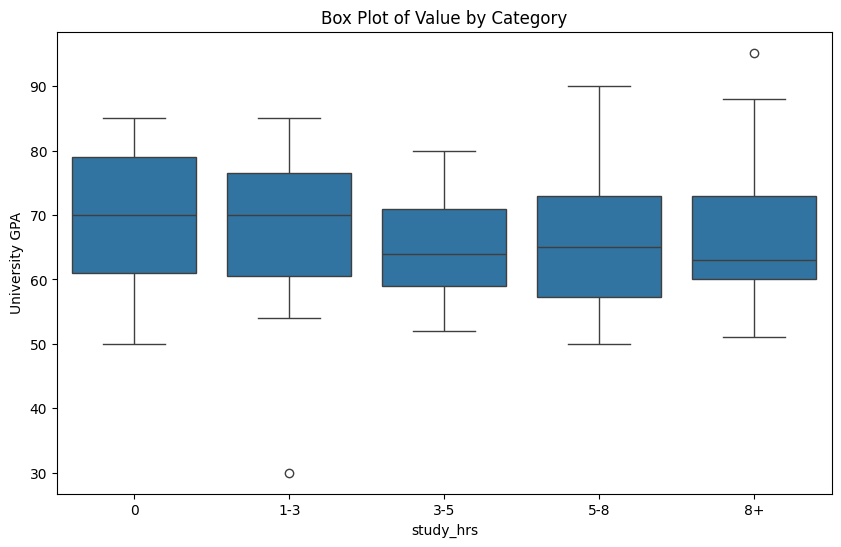

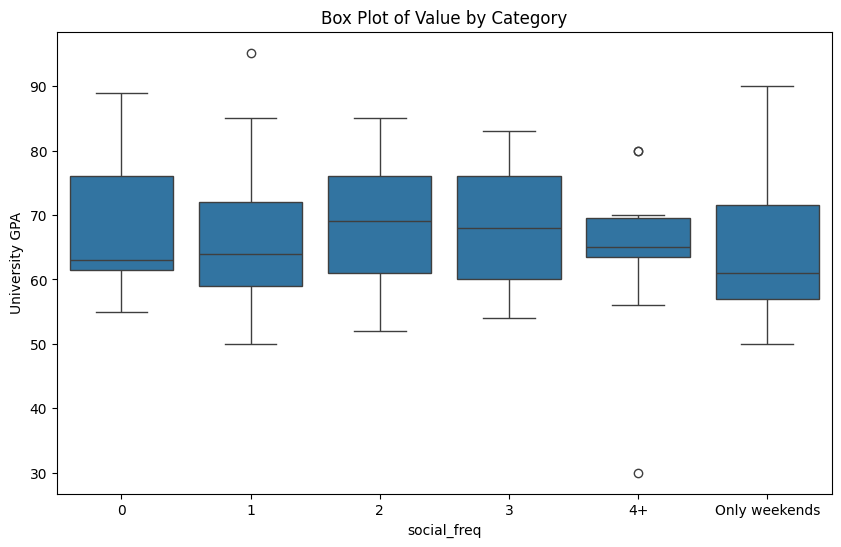

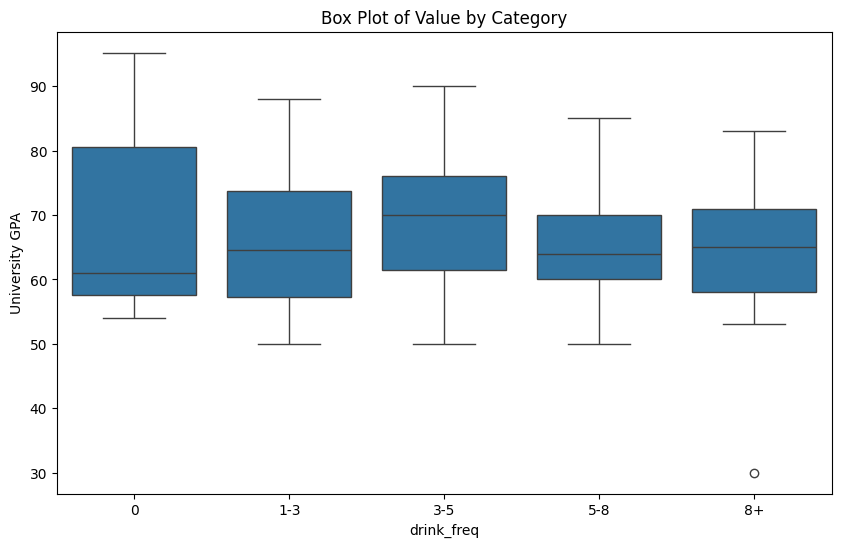

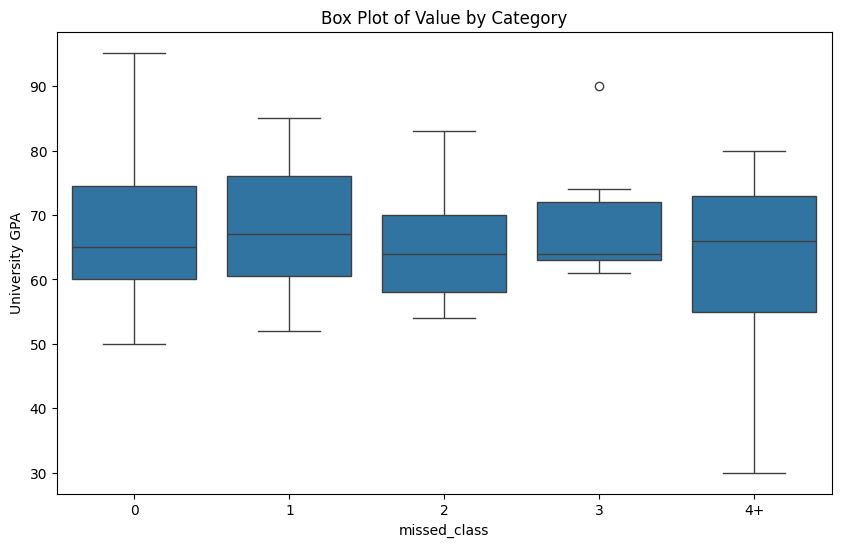

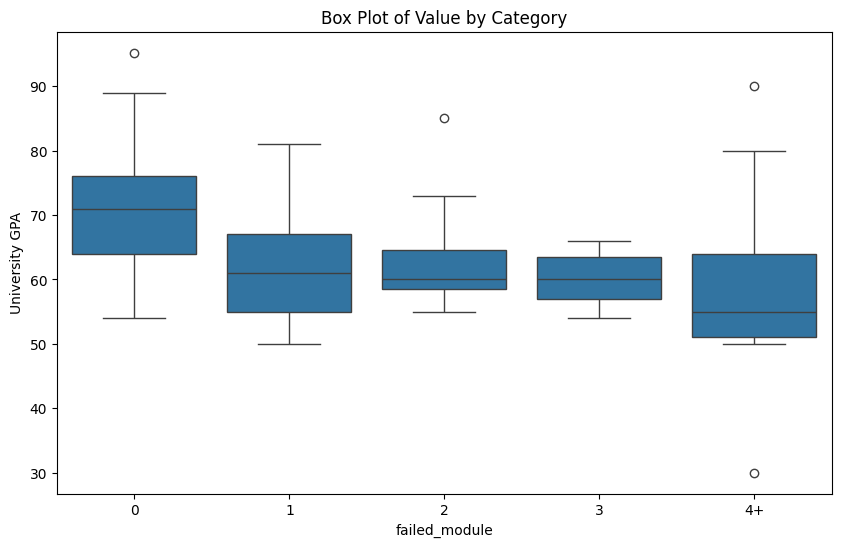

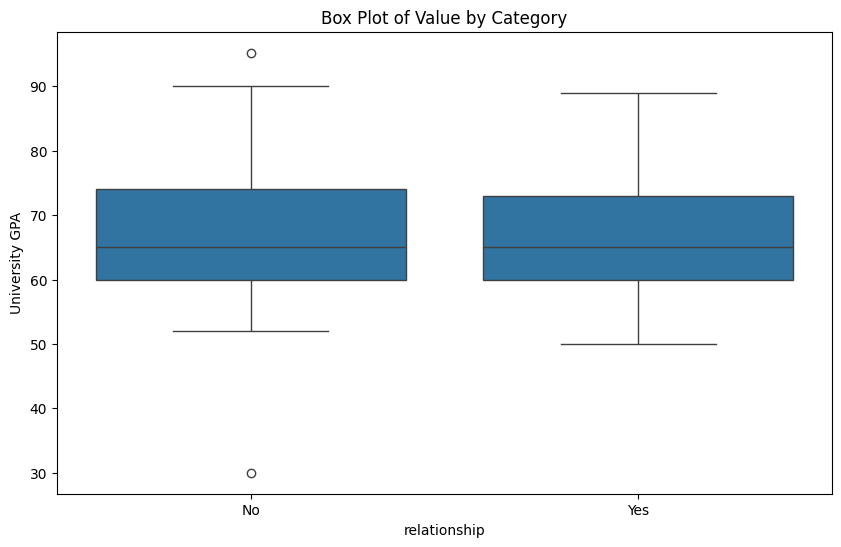

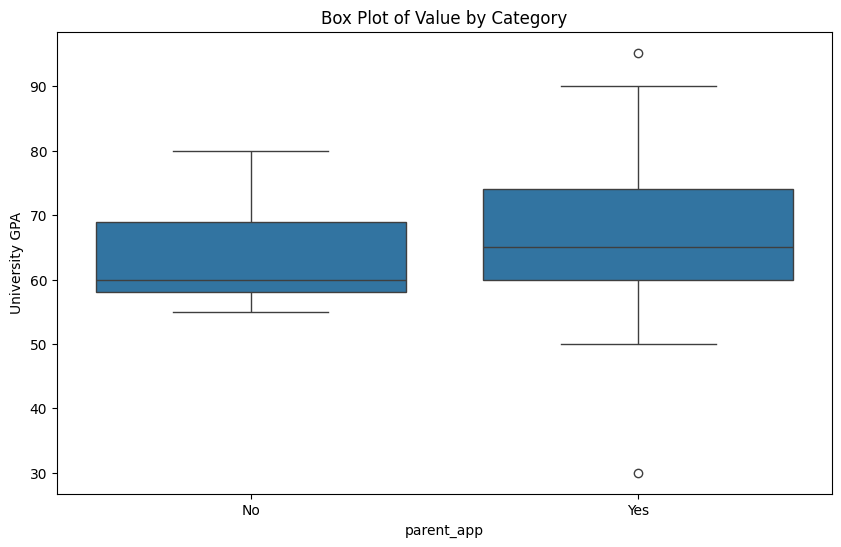

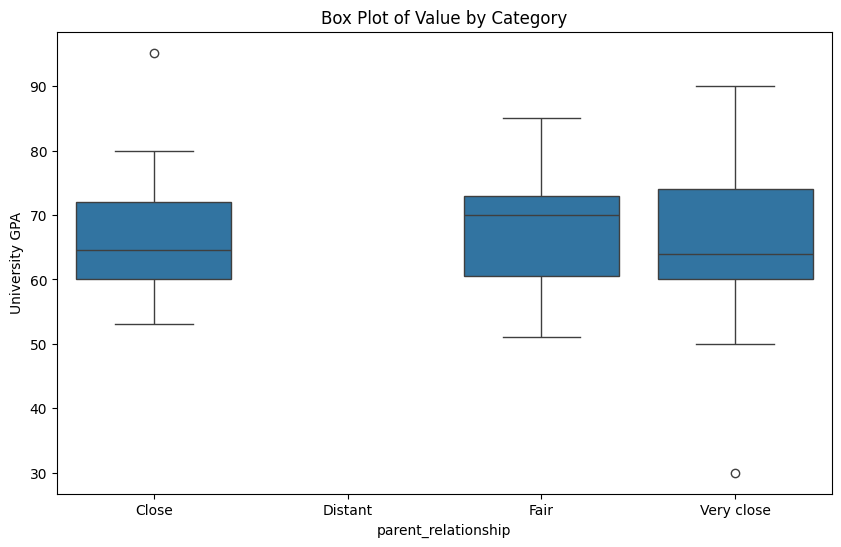

In [88]:
for column in cat_vars:

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='uni_gpa', data=df2)
    plt.title('Box Plot of Value by Category')
    plt.xlabel(column)
    plt.ylabel('University GPA')
    plt.show()

In [90]:
# Correlation matrix for variables
correlation_matrix = df2.corr(numeric_only=False).round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Male'

## Step 2: Descriptive Analysis

### A) Single Variables

In [ ]:
# Describing quantitative variables
df1.describe()

,uni_gpa
count,297.000000
mean,66.521953
std,9.310775
min,30.000000
25%,60.000000
50%,65.000000
75%,74.000000
max,95.220000


In [91]:
df_dummy = pd.get_dummies(data=df2, drop_first=True, dtype='int8')

df_dummy.info()

df_dummy.head()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 1 to 402
Data columns (total 38 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   uni_gpa                                                       161 non-null    float64
 1   sex_Male                                                      161 non-null    int8   
 2   grade_2nd Year                                                161 non-null    int8   
 3   grade_3rd Year                                                161 non-null    int8   
 4   grade_4th Year                                                161 non-null    int8   
 5   grade_Postgraduate                                            161 non-null    int8   
 6   accomodation_Private accommodation/ stay with family/friends  161 non-null    int8   
 7   allowance_R 5001 - R 6000                                     161 non-null  

,uni_gpa,sex_Male,grade_2nd Year,grade_3rd Year,grade_4th Year,grade_Postgraduate,accomodation_Private accommodation/ stay with family/friends,allowance_R 5001 - R 6000,allowance_R 6001 - R 7000,allowance_R 7001 - R 8000,...,missed_class_4+,failed_module_1,failed_module_2,failed_module_3,failed_module_4+,relationship_Yes,parent_app_Yes,parent_relationship_Distant,parent_relationship_Fair,parent_relationship_Very close
1,75.0,1,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,1
6,54.0,1,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
12,64.0,1,1,0,0,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,1
13,76.0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,1,1,0,0,1
17,65.0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,1,0,0,1


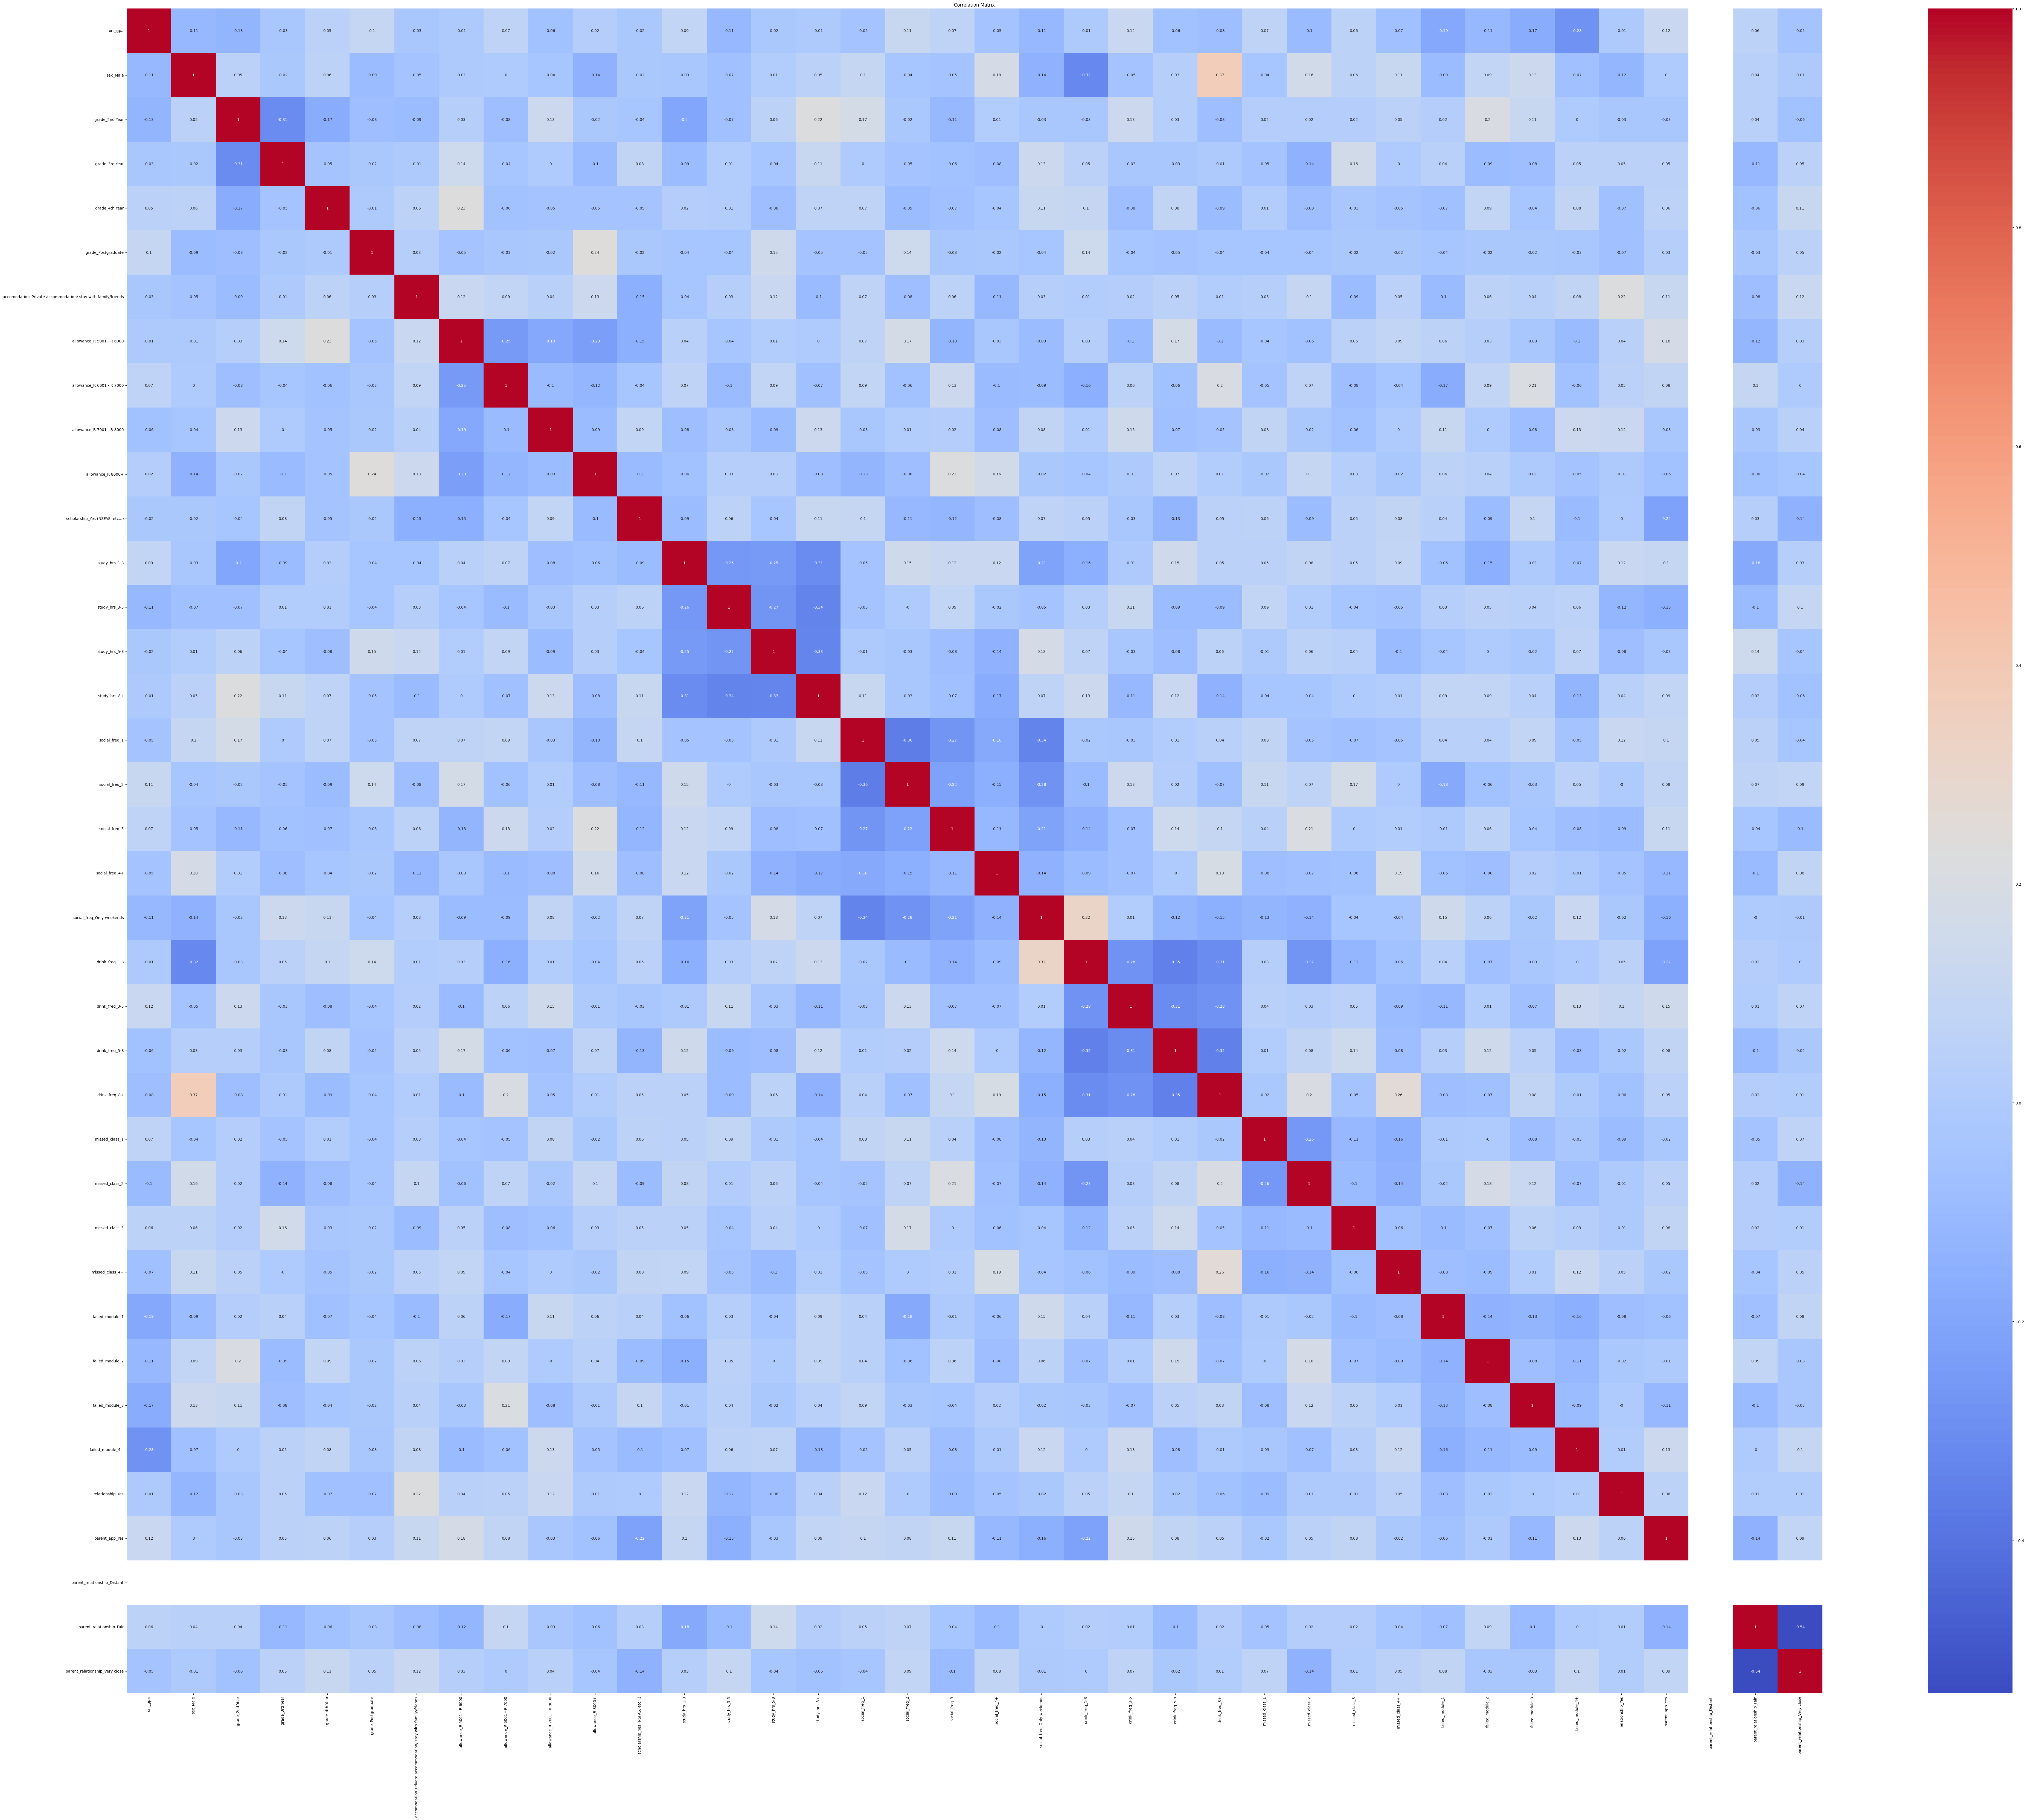

In [94]:
correlation_matrix = df_dummy.corr(numeric_only=True).round(2)
plt.figure(figsize=(100, 80))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()